In [1]:
!pip install demoji

     |████████████████████████████████| 42 kB 1.1 MB/s            


In [3]:
!pip install textblob

     |████████████████████████████████| 636 kB 1.7 MB/s            
     |████████████████████████████████| 1.5 MB 47.6 MB/s            
     |████████████████████████████████| 763 kB 45.3 MB/s            


In [2]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=9de7255ebe00290c67ca3b62759f9bcd0b04c38a57da5eccc3ebccb004776432
  Stored in directory: /home/jovyan/.cache/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [2]:
!pip install wordcloud

     |████████████████████████████████| 363 kB 1.7 MB/s            


In [2]:
!pip install textblob-fr

     |████████████████████████████████| 561 kB 1.7 MB/s            


In [2]:
import pandas as pd
import numpy as np
import requests
import searchtweets
from textblob import TextBlob
from afinn import Afinn
from datetime import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import re
from nltk.corpus import stopwords
import nltk
import demoji

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
pd.options.display.max_colwidth = 1000

In [12]:
df = pd.read_csv("~/work/projetpy/csv_tweets/tweets_vaccins.csv")

In [13]:
df

,date,id,nbre_like,nbre_retweet,screenName,texte,type,type_vaccin
0,2021-03-01 00:32:26,1366184519662006274,1,0,yokko_mars,"@silvano_trotta Au Japon, on refuse le don de sang de personnes vaccinées, peut-être #Pfizer travaille-il à résoudre ce problème ?\nhttps://t.co/HFMPvtEfPY",tweet,pfizer
1,2021-03-01 08:09:01,1366299423781892098,2,0,Epcocorico,@France_Dessinee @Pfizer_France Tragique,tweet,pfizer
2,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,janssen
3,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,moderna
4,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,pfizer
...,...,...,...,...,...,...,...,...
6036,2021-12-23 10:27:44,1473963528172277763,3,0,MonaCoCo67,"@LePoint Et ça tombe bien, la France va en recevoir 17,8 millions de doses d'ici mars 2022, suite à l'accord conclu en septembre entre l'UE et AstraZeneca pour mettre fin à leur contentieux... \n\nhttps://t.co/kpYxpPRdl0",tweet,astrazeneca
6037,2021-12-23 11:08:51,1473973873456656389,0,1,MonaCoCo67,"@le_Parisien Et ça tombe bien, la France va en recevoir 17,8 millions de doses d'ici mars 2022, suite à l'accord conclu en septembre entre l'UE et AstraZeneca pour mettre fin à leur contentieux... \n\nhttps://t.co/kpYxpPRdl0",tweet,astrazeneca
6038,2021-12-23 14:01:14,1474017257974120453,1,0,Guy5767,"@monicalova13 Deux astrazeneca et un moderna, sa doit le faire ☺",tweet,astrazeneca
6039,2021-12-26 12:22:16,1475079514103463939,1,0,ertseled491,@BriceOf_Lyon @Nouveau_Papy Je n’ai été vacciné qu’au moyen d’Astrazeneca et je n’ai aucun tracas. \nPar contre désormais j’en suis privé et pourtant je vais faire le rappel sans délai.,tweet,astrazeneca


In [14]:
df.groupby("type_vaccin").count()

,date,id,nbre_like,nbre_retweet,screenName,texte,type
type_vaccin,,,,,,,
astrazeneca,1389,1389,1389,1389,1389,1389,1389
janssen,163,163,163,163,163,163,163
moderna,1033,1033,1033,1033,1033,1033,1033
pfizer,3456,3456,3456,3456,3456,3456,3456


# Nettoyage des données

In [15]:
# fonction pour la transformation du texte (retrait des caractères spéciaux, des émojis, de la ponctuation, tranformation des majuscules en minuscule, etc)
def transforme(texte):
    texte = texte.lower() # mettre les mots en minuscule
    #retirer les liens
    for item in re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+").findall(texte):
        texte=texte.replace(item, "")
    # enlever le retour à la ligne
    texte = texte.replace("\n", " ").replace("\r", "") 
    # supprimer ",", "!", "?", "%", "(",")","/",'"', "$","£", "_", "-", "+", "*", "µ", ":","&,"§" 
    texte = re.sub(r"[,\!\?\%\(\)\/\"\$\£\-\+\*\µ,\:\&\§]", " ", texte) 
    # retirer les hashtags #
    for item in re.compile("([#]\w+)").findall(texte):
        texte=texte.replace(item, "")
    # retirer les apostrophes '
    for item in re.compile("([\’])").findall(texte):
        texte=texte.replace(item, " ")
    for item in re.compile("([\'])").findall(texte):
        texte=texte.replace(item, " ")
    # retirer les points de suspension
    for item in re.compile("([.]{1,5})").findall(texte):
        texte=texte.replace(item, "") 
    # retirer les personnes tagées
    for item in re.compile("([@]\w+)").findall(texte):
        texte=texte.replace(item, "")
    # retirer les adresses mail
    for item in re.findall('\S+@\S+', texte) :
        texte=texte.replace(item, "")
    # retire les mots contenant des chiffres
    texte = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", texte)
    # retirer les emojis
    for item in demoji.findall(texte):
        texte=texte.replace(item,"")
    return texte
    

In [18]:
df["texte_propre"]=df["texte"].apply(lambda x: transforme(x))
df.head()

,date,id,nbre_like,nbre_retweet,screenName,texte,type,type_vaccin,texte_propre
0,2021-03-01 00:32:26,1366184519662006274,1,0,yokko_mars,"@silvano_trotta Au Japon, on refuse le don de sang de personnes vaccinées, peut-être #Pfizer travaille-il à résoudre ce problème ?\nhttps://t.co/HFMPvtEfPY",tweet,pfizer,au japon on refuse le don de sang de personnes vaccinées peut être travaille il à résoudre ce problème
1,2021-03-01 08:09:01,1366299423781892098,2,0,Epcocorico,@France_Dessinee @Pfizer_France Tragique,tweet,pfizer,tragique
2,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,janssen,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin
3,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,moderna,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin
4,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,pfizer,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin


In [19]:
# transformer chaque phrase en liste de mots
df["liste_mots"] = df["texte_propre"].apply(lambda x: nltk.word_tokenize(x, language ='french'))

In [20]:
df.head()

,date,id,nbre_like,nbre_retweet,screenName,texte,type,type_vaccin,texte_propre,liste_mots
0,2021-03-01 00:32:26,1366184519662006274,1,0,yokko_mars,"@silvano_trotta Au Japon, on refuse le don de sang de personnes vaccinées, peut-être #Pfizer travaille-il à résoudre ce problème ?\nhttps://t.co/HFMPvtEfPY",tweet,pfizer,au japon on refuse le don de sang de personnes vaccinées peut être travaille il à résoudre ce problème,"[au, japon, on, refuse, le, don, de, sang, de, personnes, vaccinées, peut, être, travaille, il, à, résoudre, ce, problème]"
1,2021-03-01 08:09:01,1366299423781892098,2,0,Epcocorico,@France_Dessinee @Pfizer_France Tragique,tweet,pfizer,tragique,[tragique]
2,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,janssen,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]"
3,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,moderna,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]"
4,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,pfizer,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]"


In [22]:
# Enlever les stopwords
stop_words = set(stopwords.words('french'))
# del df["stopword"]
df["mot_important"] = df["liste_mots"].apply(lambda x: [w for w in x if not w in stop_words])
df.head()

,date,id,nbre_like,nbre_retweet,screenName,texte,type,type_vaccin,texte_propre,liste_mots,mot_important
0,2021-03-01 00:32:26,1366184519662006274,1,0,yokko_mars,"@silvano_trotta Au Japon, on refuse le don de sang de personnes vaccinées, peut-être #Pfizer travaille-il à résoudre ce problème ?\nhttps://t.co/HFMPvtEfPY",tweet,pfizer,au japon on refuse le don de sang de personnes vaccinées peut être travaille il à résoudre ce problème,"[au, japon, on, refuse, le, don, de, sang, de, personnes, vaccinées, peut, être, travaille, il, à, résoudre, ce, problème]","[japon, refuse, don, sang, personnes, vaccinées, peut, être, travaille, résoudre, problème]"
1,2021-03-01 08:09:01,1366299423781892098,2,0,Epcocorico,@France_Dessinee @Pfizer_France Tragique,tweet,pfizer,tragique,[tragique],[tragique]
2,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,janssen,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations, pfizer, moderna, espérons, millions, vaccinations, lieu, entre, avril, juin]"
3,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,moderna,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations, pfizer, moderna, espérons, millions, vaccinations, lieu, entre, avril, juin]"
4,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,pfizer,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations, pfizer, moderna, espérons, millions, vac

# Calcul du label à partir de la polarité de Textblob

In [23]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [24]:
def tweet_polarite(text):
    return tb(text).sentiment[0]

def tweet_label(text):
    if tweet_polarite(text) > 0 :
        return 1
    if tweet_polarite(text) < 0 :
        return -1
    return 0

In [26]:
df["score"] = df["texte_propre"].apply(tweet_polarite)

In [27]:
df["label"] = df["texte_propre"].apply(tweet_label)
df.head()

,date,id,nbre_like,nbre_retweet,screenName,texte,type,type_vaccin,texte_propre,liste_mots,mot_important,score,label
0,2021-03-01 00:32:26,1366184519662006274,1,0,yokko_mars,"@silvano_trotta Au Japon, on refuse le don de sang de personnes vaccinées, peut-être #Pfizer travaille-il à résoudre ce problème ?\nhttps://t.co/HFMPvtEfPY",tweet,pfizer,au japon on refuse le don de sang de personnes vaccinées peut être travaille il à résoudre ce problème,"[au, japon, on, refuse, le, don, de, sang, de, personnes, vaccinées, peut, être, travaille, il, à, résoudre, ce, problème]","[japon, refuse, don, sang, personnes, vaccinées, peut, être, travaille, résoudre, problème]",0.00,0
1,2021-03-01 08:09:01,1366299423781892098,2,0,Epcocorico,@France_Dessinee @Pfizer_France Tragique,tweet,pfizer,tragique,[tragique],[tragique],-0.40,-1
2,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,janssen,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations, pfizer, moderna, espérons, millions, vaccinations, lieu, entre, avril, juin]",0.15,1
3,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,moderna,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations, pfizer, moderna, espérons, millions, vaccinations, lieu, entre, avril, juin]",0.15,1
4,2021-03-01 08:42:07,1366307752096768000,2,0,socarre,"@thierrycogne @dc_morel Vaccinons en pharmacie et chez les médecins, avec AztraZeneca et Janssen qui va arriver en avril. Ouvrons plus de RDV sur les centres de vaccinations pour Pfizer et Moderna. Espérons que des millions de vaccinations auront lieu entre avril et juin.🙏",tweet,pfizer,vaccinons en pharmacie et chez les médecins avec aztrazeneca et janssen qui va arriver en avril ouvrons plus de rdv sur les centres de vaccinations pour pfizer et moderna espérons que des millions de vaccinations auront lieu entre avril et juin,"[vaccinons, en, pharmacie, et, chez, les, médecins, avec, aztrazeneca, et, janssen, qui, va, arriver, en, avril, ouvrons, plus, de, rdv, sur, les, centres, de, vaccinations, pour, pfizer, et, moderna, espérons, que, des, millions, de, vaccinations, auront, lieu, entre, avril, et, juin]","[vaccinons, pharmacie, chez, médecins, aztrazeneca, janssen, va, arriver, avril, ouvrons, plus, rdv, centres, vaccinations

# Visualisations

## Stats descriptives

## Avec Wordcloud

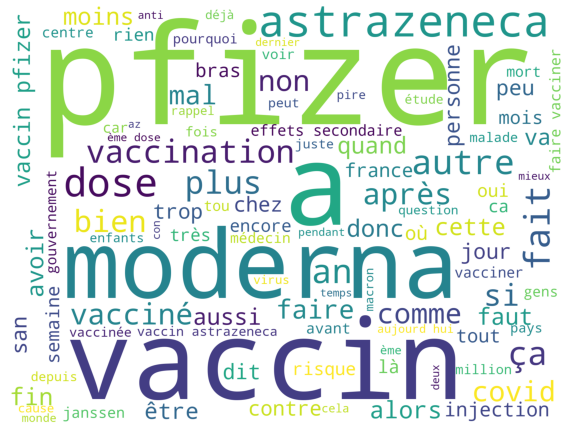

In [31]:
df_cloud = df[df['label']==-1] 
# join tweets to a single string
words = ' '.join(df_cloud['texte_propre'])

wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2000,
                      height=1500, max_words=100
                     ).generate(words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

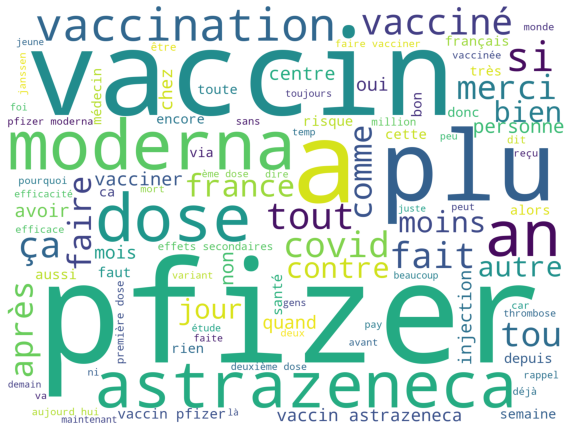

In [32]:
df_cloud = df[df['label']==1] 
# join tweets to a single string
words = ' '.join(df_cloud['texte_propre'])

wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2000,
                      height=1500, max_words=100
                     ).generate(words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

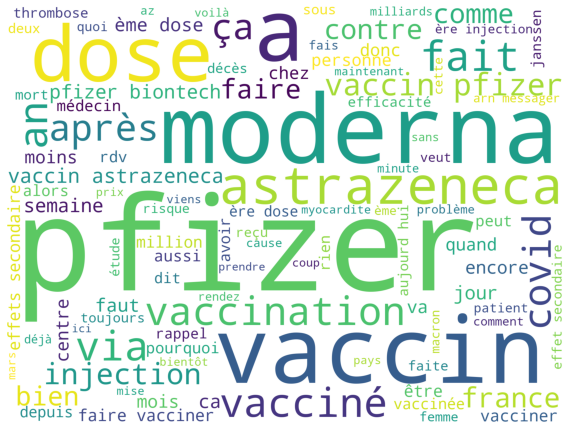

In [33]:
df_cloud = df[df['label']==0] 
# join tweets to a single string
words = ' '.join(df_cloud['texte_propre'])

wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2000,
                      height=1500, max_words=100
                     ).generate(words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Définition des métadonnées

In [ ]:
def decompte_hashtags(text):
    exp_match = re.compile("([#]\w+)")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_hashtags"] = df_tweets["text"].apply(lambda x : decompte_hashtags(x))

In [ ]:
def decompte_tags(text):
    exp_match = re.compile("([@]\w+)")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_tags"] = df_tweets["text"].apply(lambda x : decompte_tags(x))

In [ ]:
def decompte_mails(text):
    exp_match = re.compile("(\w+[@]\w+[.]\w+)")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_mails"] = df_tweets["text"].apply(lambda x : decompte_mails(x))

In [ ]:
def decompte_exclamation(text):
    exp_match = re.compile("(\w?\s?[!])")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_exclamation"] = df["text"].apply(lambda x : decompte_exclamation(x))

In [ ]:
def decompte_interrogation(text):
    exp_match = re.compile("(\w?\s?[?])")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_interrogation"] = df_tweets["text"].apply(lambda x : decompte_interrogation(x))

In [ ]:
def decompte_mot_maj(text):
    exp_match = re.compile("([A-Z][A-Z]+)")
    res = exp_match.findall(text)
    return len(res)

df_tweets["nbre_maj"] = df_tweets["text"].apply(lambda x : decompte_mot_maj(x))

In [ ]:
df_tweets.head()

# Classification